# Visualizing World Bank Indicators

This notebook is dedicated to the capstone project for the Python for Everybody specialization, 
offered by the university of Michigan through Coursera.

My focus for this project was to extract data from the World Bank and visualize it.  I first created a database, 'countries.sqlite' where all of the retrieved data was going to be stored.  In the database, I then inserted normalized tables that would store all of the data.  The tables contained in the database, along with their respective columns, are the following:
* AllData - id, country id, indicator value, indicator id, and date(the year of the data)
* Indicators - id, indicator code, category id, indicator name, last updated(year)
* Countries - id, country name, country code, iso2code, income id, region id
* Region - id, code, region name
* IncomeLevel - id, income level prefix, income level name
* Categories - id, category name

For the work flow, the following list describes the order the tables were created:
1. IncomeLevel and Region were extracted independent of the indicators of interest


2. Countries was then created using the IncomeLevel and Region tables to normalize some of the information


3. Categories and Indicators were created afterwards.  These two tables are populated by the user.  The script asks for an indicator code and category name.  The category is first inserted if new, then the corresponding id is retrieved.  This id, used as a foreign key, is then used to insert the indicator into the Indicators table.  The 'last updated' column came to me after struggling with how to create a workflow that would check for updates without having to check the World Bank api manually.


4. AllData was the final table.  The script to update it loops through every indicator currently in the Indicators table by first checking the last updated year.  If that year is less than the current maximum year in the database, then calls to the World Bank API are made with the year incremented until it reaches the latest year.  The script caps the number of updates (classified as an indicator value for a country in a given year) to 10000.  Each time the script is run, it checks every indicator for new data until it finds something to update, else it closes.









The following plotting functions where then created to help visualize the data.
Note that each function also requires a cursor object as each function pulls data from the countries.sqlite database.

* plot_indicator_countries- this function takes in a list of countries and creates a single plot of a single indicator.


* plot_indicators_country- this function takes in a list of indicators for a single country.  Each indicator is given its own plot and the individual subplots are arranged in a square shape manner (the closest rectangle to a square is approximated if a square is not possible...).  This functon serves as a general purpose tool to visualize multiple, unrelated or related, indicators for a particular country.


* plot_indicators_countries- this function takes in a list of indicators and a list of countries and plots each indicator-country combination in a separate subplot.  Each indicator correspond to a row, with the idea being that you want to plot related indicators for different countries, for the purposes of comparing and contrasting.


* plot_indicator_indicator- this funciton takes in a single country and plots two indicators against each other.  Only years where both indicators are populated are plotted against each other.  Each marker is also labeled so the trends can be seen as time passes.


* stacked_bar_graphs- this function takes in a list of countries along with a list of related indicators and creates a stacked bar graph.  Each country is given a separate plot.  The user decides the subplot layout as well as whether to display every year or only the years where every indicator has data.  The intention is to plot indicators that are related and have the same scales.  For example: % of population 0-14, % of population 15-64, and % of population 65+.



In [1]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import plotting_indicators_over_time as pi




In [2]:
# connect to the database on file, optional view of every indicator code with its corresponding name
conn = sqlite3.connect('countries.sqlite')
cur = conn.cursor()

see_curr_ind = input("Do you wish to see the current indicators? (Y/N): ").upper()
if see_curr_ind == 'Y':
    cur.execute('SELECT indicator, name FROM Indicators')
    for row in cur:
        print(row[0], row[1])

Do you wish to see the current indicators? (Y/N): y
SP.POP.TOTL Population, total
SP.POP.1564.TO.ZS Population ages 15-64 (% of total population)
SP.POP.65UP.TO.ZS Population ages 65 and above (% of total population)
SP.POP.0014.TO.ZS Population ages 0-14 (% of total population)
NY.GDP.MKTP.CD GDP (current US$)
NY.GDP.PCAP.CD GDP per capita (current US$)
TM.VAL.MRCH.XD.WD Import value index (2000 = 100)
TX.VAL.MRCH.XD.WD Export value index (2000 = 100)
BM.GSR.TOTL.CD Imports of goods, services and primary income (BoP, current US$)
BX.GSR.TOTL.CD Exports of goods, services and primary income (BoP, current US$)
SE.PRM.CMPT.ZS Primary completion rate, total (% of relevant age group)
SE.TER.CUAT.DO.ZS Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)
SE.SEC.CUAT.PO.ZS Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)
SE.SEC.CUAT.LO.ZS Educational attainment, at least completed lower secondary, population 2

## The first function plots the indicator of different countries on a single graph.

### plot_indicator_countries(cur, country_codes, indicator)


In [3]:
country_codes = ['USA', 'URY', 'MEX', 'ARG', 'VNM', 'SLV', 'CMR', 'ETH']
# indicators of interest
total_population = 'sp.pop.totl'
net_income = 'NY.ADJ.NNTY.PC.CD'
primary_education = 'SE.PRM.CMPT.ZS'


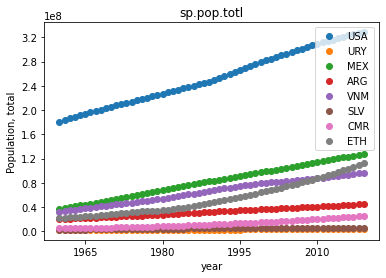

In [4]:
pi.plot_indicator_countries(cur,country_codes, total_population) 


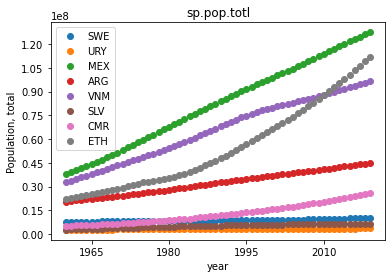

In [5]:
# replacing the USA with SWE, 
country_codes_no_usa = ['SWE','URY', 'MEX', 'ARG', 'VNM', 'SLV', 'CMR', 'ETH']
pi.plot_indicator_countries(cur,country_codes_no_usa, total_population) 

The population for most countries is increasing, which makes sense as the world population continues to grow.  Sweden(blue), Uruguay(orange), and El Salvador(brown) seem to really be stagnating when it come to population growth.  It will be interesting to see their population break down in a stacked bar graph.(to come later in this notebook ...)

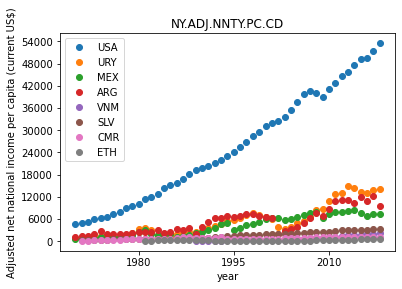

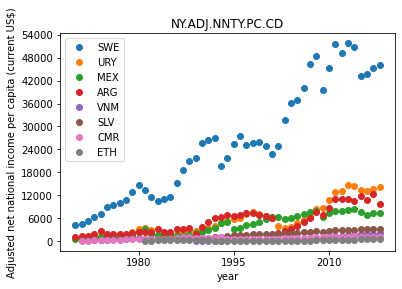

In [6]:
# for net income
pi.plot_indicator_countries(cur, country_codes, net_income)

pi.plot_indicator_countries(cur,country_codes_no_usa, net_income)


The country codes were selected to be representative of the different income level designations.  From the plots it is clear that the divide between the high income countries and everyone else is quite large.  The USA was replaced with Sweden but that did not help in visualizing the other countries, so remove both of them.  Even Uruguay, classified as high income, is closer to the upper middle income levels.

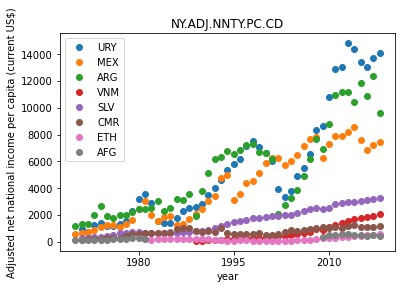

In [7]:
# removing the USA and SWE, adding in AFG
country_codes_no_high_income = ['URY', 'MEX', 'ARG', 'VNM', 'SLV', 'CMR', 'ETH', 'AFG']

pi.plot_indicator_countries(cur,country_codes_no_high_income, net_income)

The countries at the bottom are still hard to distinguish so let us remove URY, ARG, and MEX.  For these three countries, the net income does seem to be moving in the right direction.  The question is, who is moving up in these countries? (a reference to income inequality ...)  Also adding in Haiti.

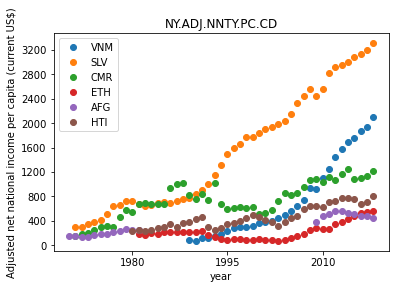

In [8]:
country_codes_no_high_upper_middle_income = ['VNM', 'SLV', 'CMR', 'ETH', 'AFG', 'HTI']
pi.plot_indicator_countries(cur,country_codes_no_high_upper_middle_income, net_income)

Among these countries, El Salvador and Vietnam seem to be experiencing decent net income growth.
Now let us turn to education.

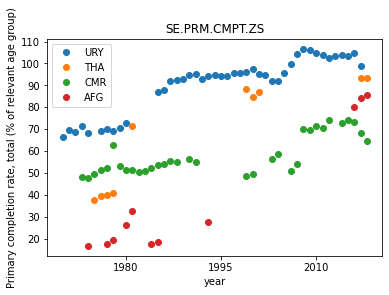

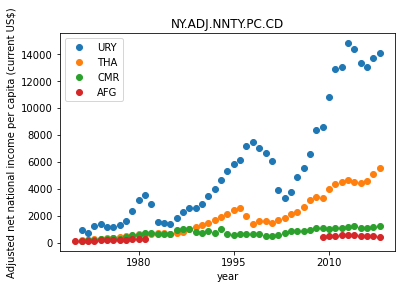

In [9]:
# primary educational attainment, the data is more sporadic so reduce the number of countries ...
country_codes = ['URY', 'THA', 'CMR', 'AFG']
pi.plot_indicator_countries(cur,country_codes, primary_education) 
pi.plot_indicator_countries(cur, country_codes, net_income)

The income classifications are as follows: Uruguay - high income, Thailand - upper middle income, Cameroon - lower middle income, and Afghanistan - low income.  Note that Afghanistan has made large jump in primary educational attainment.  The question is did the jump happen linearly from the early 90's to now, or did it spike up in recent years?  The trendlines for every country are pointing up, which is a good thing.  The net income plot shows that only two countries are growing in that area: Uruguay and Thailand.  This makes Afghanistan's primary educational attainment jump all the more interesting.

## The next function plots several indicators for a given country.
### plot_indicators_country(cur, country_code, indicators)
This is a general purpose function.


C:\Users\JCO\Desktop\py4e\course_4\capstone_data_project\plotting_indicators_over_time.py:83: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad = .5)


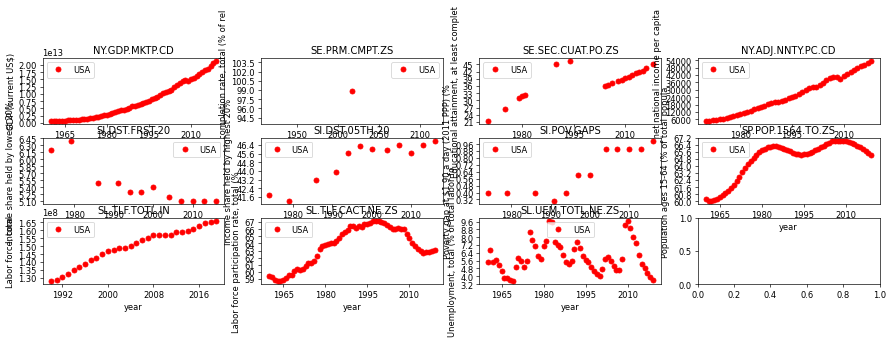

In [10]:
country_code = 'USA'
snap_shot_indicators = ['NY.GDP.MKTP.CD', 'SE.PRM.CMPT.ZS', 'SE.SEC.CUAT.PO.ZS', 'NY.ADJ.NNTY.PC.CD', 'SI.DST.FRST.20', 'SI.DST.05TH.20', 'SI.POV.GAPS', 'SP.POP.1564.TO.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.CACT.NE.ZS', 'SL.UEM.TOTL.NE.ZS']

pi.plot_indicators_country(cur, country_code, snap_shot_indicators)

Perhaps plotting all of these indicators was a bit ambitious ... Reduce the number of indicators to a maximum of four.  The new groupings are as follows: 

* group 1 = GDP, primary educational attainment, post secondary attainment
* group 2 = net income, income by highest 20%, income by lowest 20%, poverty gap at 1.90 dollars
* group 3 = population 15 to 64, total labor force, labor force participation rate, and unemployment rate


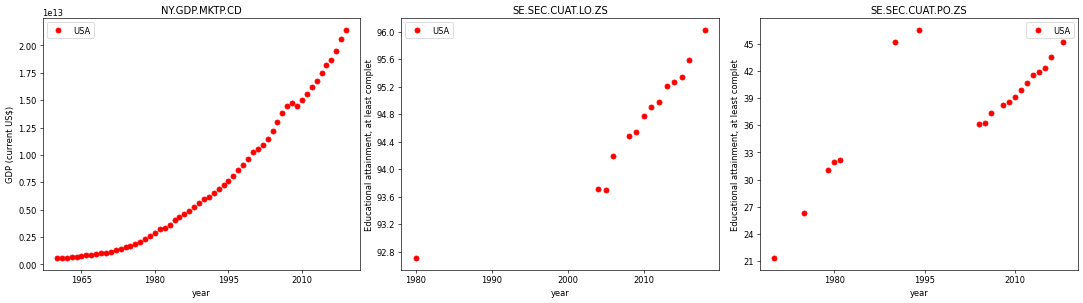

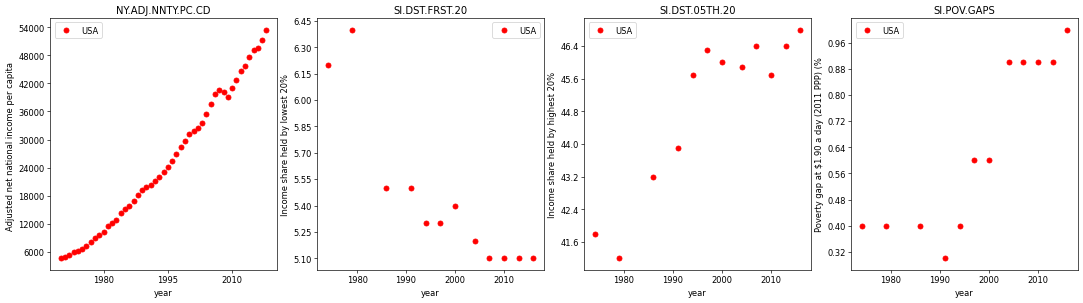

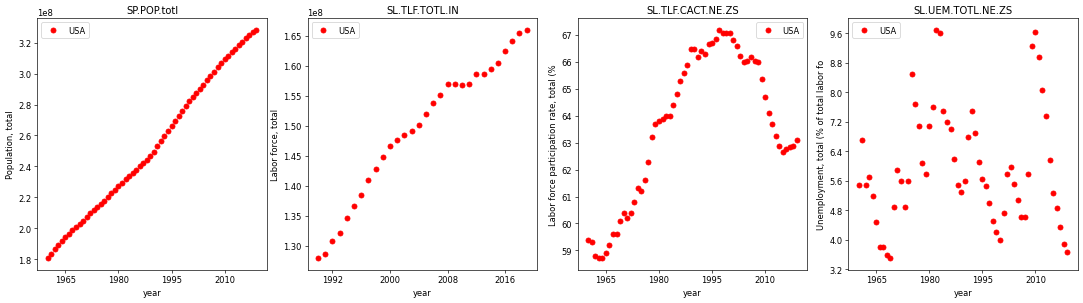

In [11]:
import plotting_indicators_over_time as pi
country_code = 'USA'

indicators_group_1 = ['NY.GDP.MKTP.CD', 'SE.SEC.CUAT.LO.ZS', 'SE.SEC.CUAT.PO.ZS']
indicators_group_2 = ['NY.ADJ.NNTY.PC.CD', 'SI.DST.FRST.20', 'SI.DST.05TH.20', 'SI.POV.GAPS']
indicators_group_3 = ['SP.POP.totl', 'SL.TLF.TOTL.IN', 'SL.TLF.CACT.NE.ZS', 'SL.UEM.TOTL.NE.ZS']

pi.plot_indicators_country(cur, country_code, indicators_group_1, True)
pi.plot_indicators_country(cur, country_code, indicators_group_2, True)
pi.plot_indicators_country(cur, country_code, indicators_group_3, True)

#### Quick Thoughts on the USA (high income country):

GDP is increasing rapidly.  Most people get past middle school and almost half have completed a post secondary degree.  The net income has increased in similar fashion to the GDP.  With this growing income has come an increase in the wealth gap.  The lowest 20% own about 1% less while the top 20% own about 5% more.  The fact that these two are uneven changes means the middle 60% must have lost some of their income share.  You hear about the diminishing middle class, and this lends some visuals to that effect.  The labor force participation rate peaked around 2000 at about 67% but is now down to 63%.  Finally, the unemployment rate pikes to about 10%  during economic downturns.  It will be interesting to see what this graph looks like in 10 years because of the coronavirus.

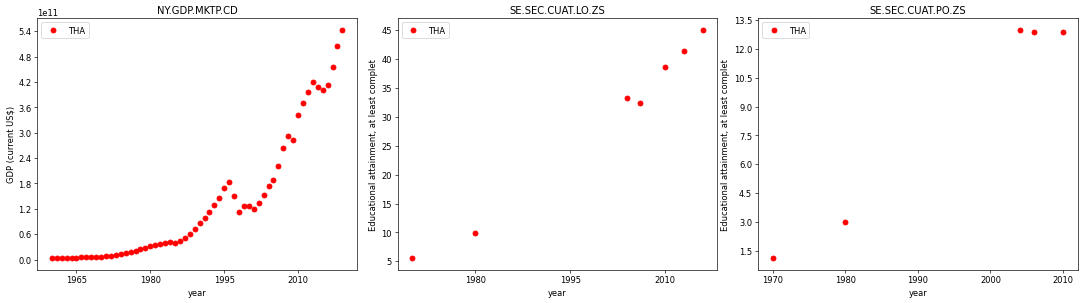

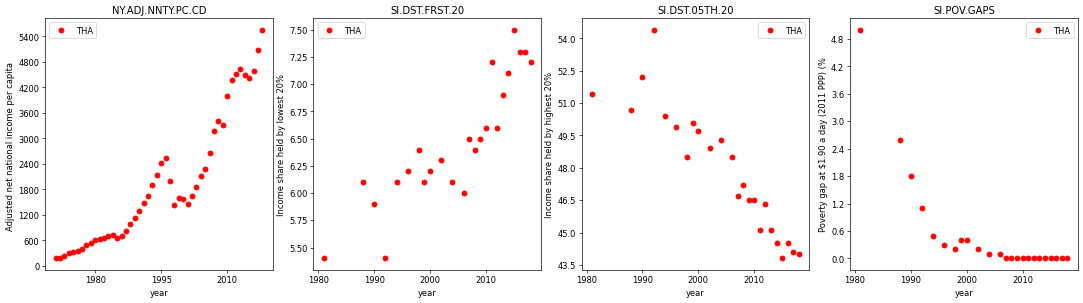

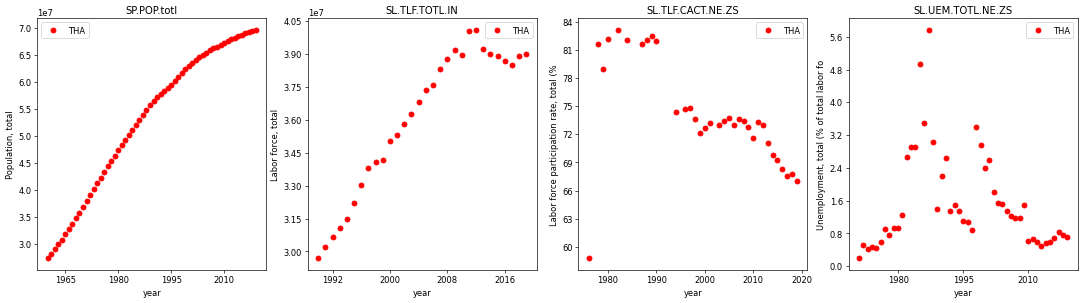

In [12]:
country_code = 'THA'

pi.plot_indicators_country(cur, country_code, indicators_group_1, True)
pi.plot_indicators_country(cur, country_code, indicators_group_2, True)
pi.plot_indicators_country(cur, country_code, indicators_group_3, True)

#### Quick thoughts on Thailand (upper middle income): 

GDP is increasing exponentially.  Primary completion rates have more than doubled and the post secondary degree completion has increase about ten fold.  The net income has followed the GDP curve.  Income inequality has also gone down.  The bottom 20% increased their share by 2% points while the top 20% have lost about 10% points.  This means that the middle class has also increased their income share.  The poverty gap has also decreased dramatically.  The labor force participation rate was above 80% during the 80s and 90s but has dropped to around 70%.  The unemployment rate has been very low, at around 2% in the last 20 years.  The most recent spike in unemployment, which occured around 1995, was accompanied by a drop in the labor force participation rate.

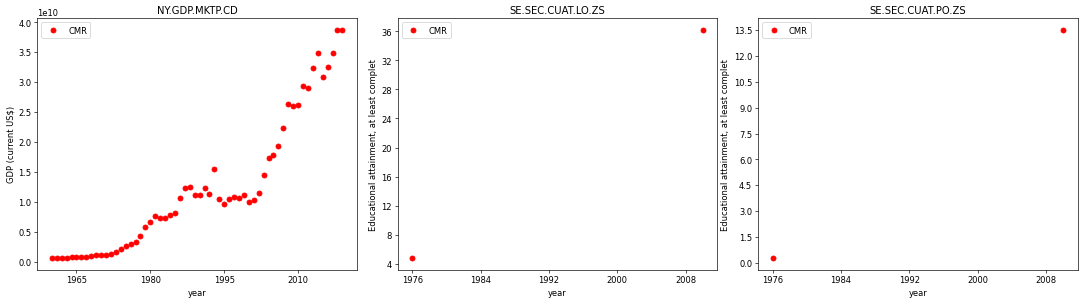

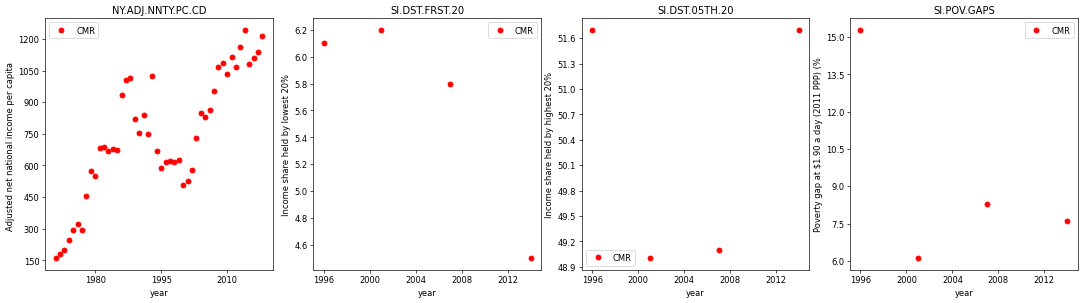

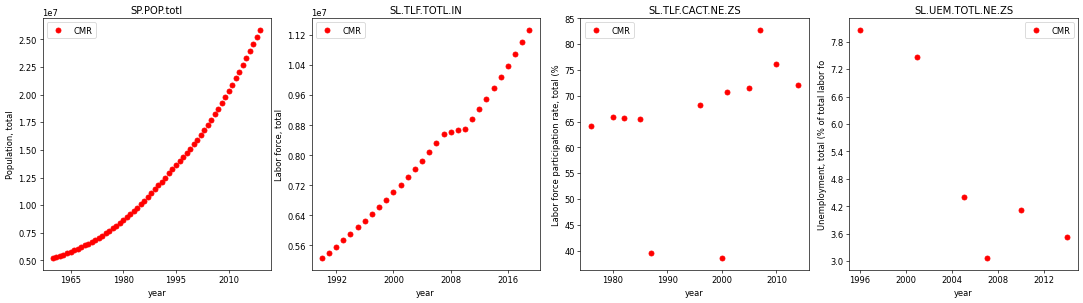

In [13]:
country_code = 'CMR'

pi.plot_indicators_country(cur, country_code, indicators_group_1, True)
pi.plot_indicators_country(cur, country_code, indicators_group_2, True)
pi.plot_indicators_country(cur, country_code, indicators_group_3, True)

#### Quick thoughts on Cameroon (lower middle income):

The GDP curve is very similar to that of the USA and Thailand, increasing rapidly.  Primary completion percentages have also gone up about 20%.  Note that while the USA and Thailand had a primary completion rate above 95%, Cameroons has plateaued around 70%, even going down in recent years.  Net income has risen while inequality has increased.  The bottom 25% have lost about 2% points while the top 20% have gained returned to their 1996 high of 53%.  The poverty gap has decreased by a factor of 2, so that is good.  The labor force participation rate tends to swing up and down, going from 65% to 40%, and then back to 65%, twice.  It is currently in good shape at around 75%.  The high labor force participation rate suggests that the drop in the unemployment rate is due to more jobs being added to the economy as opposed to people leaving the work force.



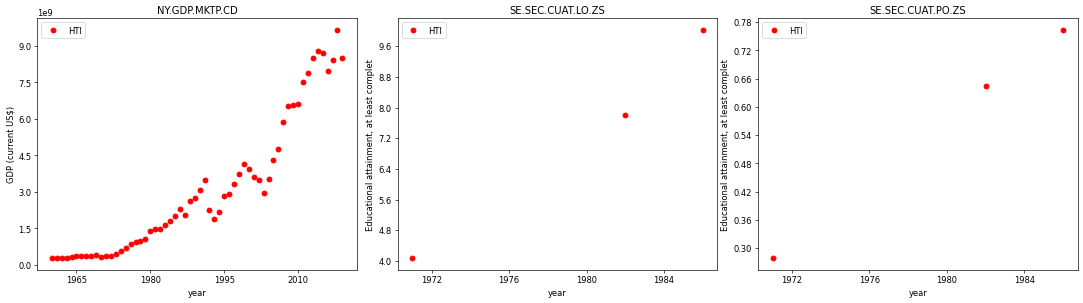

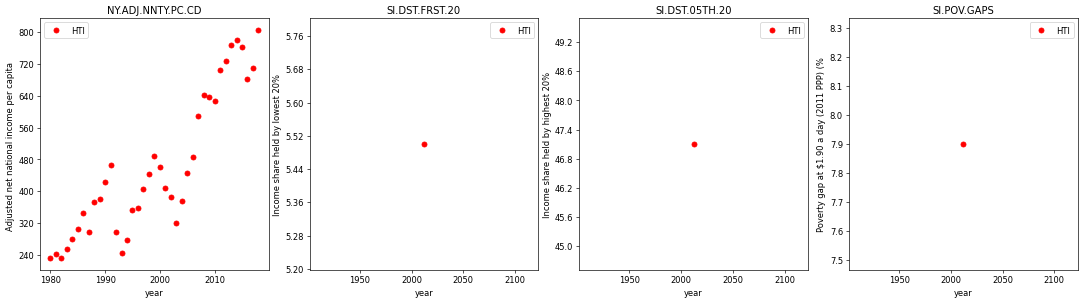

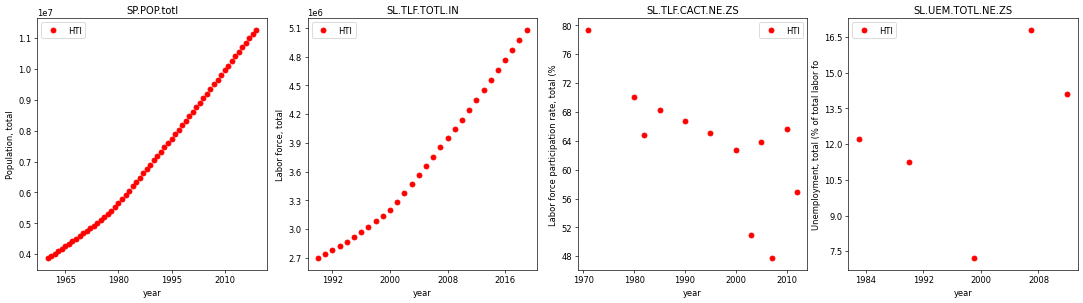

In [14]:
country_code = 'HTI'

pi.plot_indicators_country(cur, country_code, indicators_group_1, True)
pi.plot_indicators_country(cur, country_code, indicators_group_2, True)
pi.plot_indicators_country(cur, country_code, indicators_group_3, True)

#### Quick thoughts on Haiti (low income):

Haiti's enconomy has grown but their primary educational attainment is still below 50%.  The data is sparse for Haiti as the primary educational attainment data stops at 1996.  Net income has increased but the other economic data is empty so the poverty levels are hard to gauge.  The labor force has almost doubled but the labor force participation rate has almost done the opposite, meaning that the total population is growing much faster than the labor force.  The unemployment rate is also high, sitting at around 15%.



## The next function plots a list of indicators for a list of countries
### plot_indicators_countries(cur, country_codes, indicators, ylabels)

The goal of this function is to allow you to compare different countries based on a set of related indicators.

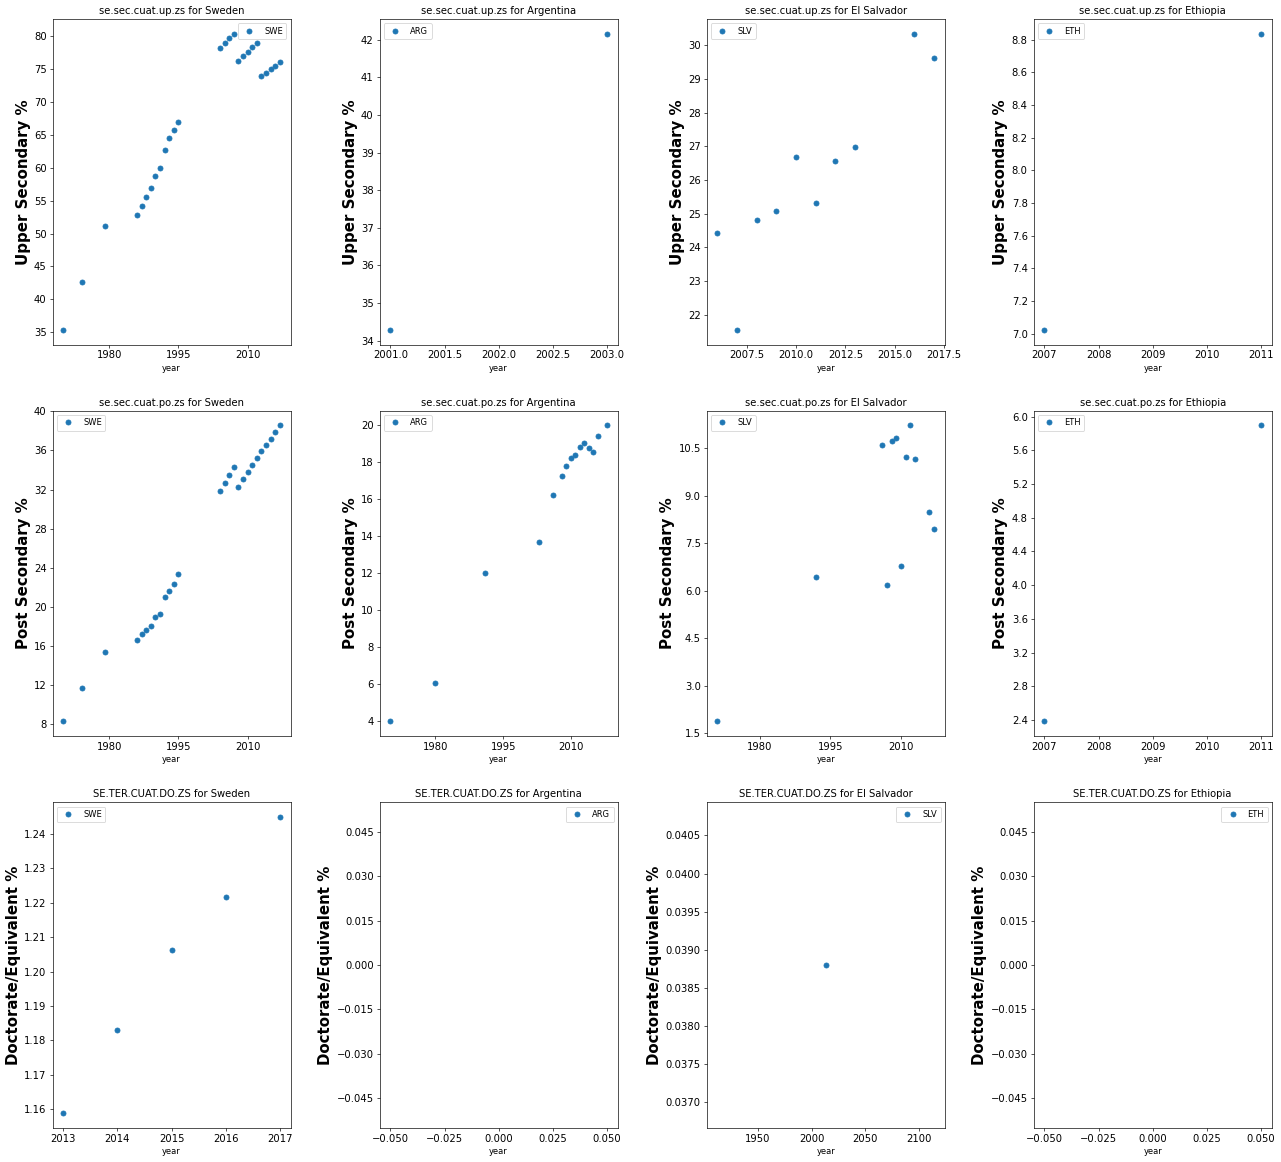

In [15]:
country_code_list = ['SWE', 'ARG', 'SLV', 'ETH']
educational_indicators = ['se.sec.cuat.up.zs', 'se.sec.cuat.po.zs', 'SE.TER.CUAT.DO.ZS' ]
ylabels_edu = ['Upper Secondary %', 'Post Secondary %', 'Doctorate/Equivalent %']
economic_indicators = ['NY.GDP.MKTP.CD', 'BM.GSR.TOTL.CD', 'BX.GSR.TOTL.CD']
ylabels_econ = ['GDP (US $)', 'Imports (US $)', 'Exports (US $)']

pi.plot_indicators_countries(cur, country_code_list, educational_indicators, ylabels_edu)

#### Educational Indicator Observations

The income designations for the countries chosen are as follows: Sweden- high income, Argentina- upper middle income, El Salvador- lower middle income, and Ethiopia- low income.  Visually, the amount of educational data tends to increase as the income designation increases with the exception of Argentina and its upper secondary reporting being lower than El Salvador's.  THe disparity in high school completion(upper secondary) is clearly correlated with income designation.  Sweden almost doubles Argentina in this category.  Argentina is only 10% points ahead of El Salvador but the gap between El Salvador and Ethiopia is about 20%.  

When it comes to post secondary completion, the percentages get approximately halved as you move from one income level designation to the next.  Sweden is currently near 40%, Argentina is near 20%, El Salvador is near 10% and Ethiopia is near 5%.  Sweden and Argentina have also showsn the largest jumps in this category over time.  Doctoral percentages are low across the board.  Sweden is at about 1.2% while the rest of the charts are basically empty.  


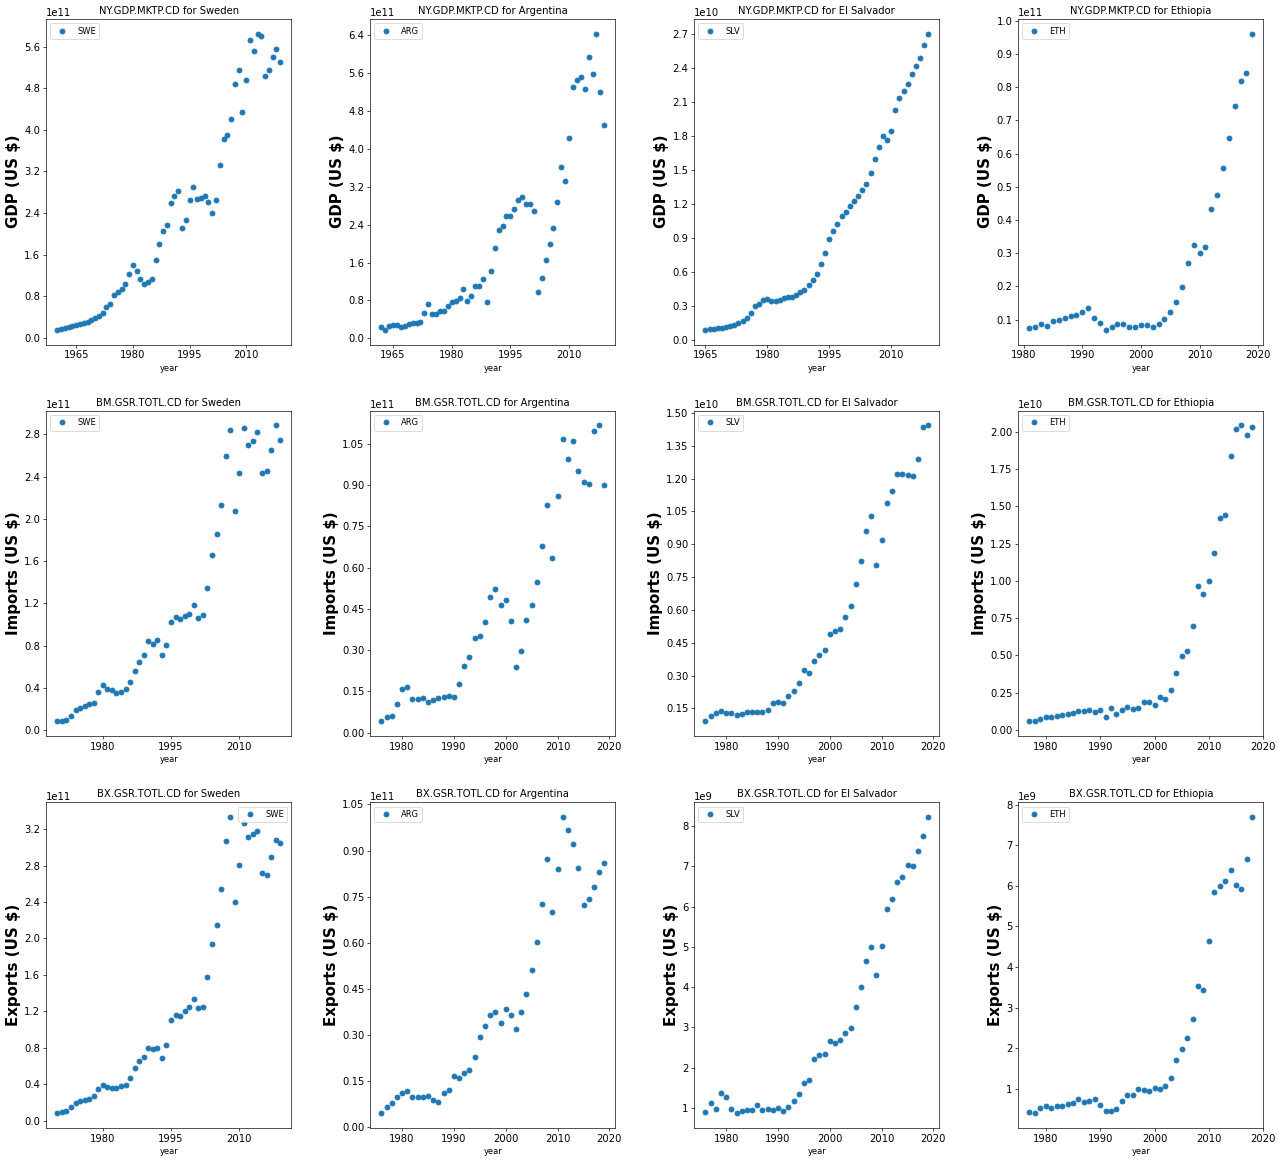

In [16]:
pi.plot_indicators_countries(cur, country_code_list, economic_indicators, ylabels_econ)

#### Economic Indicator Observations

The economic data is more straight forward as every measure is increasing over time.  To expand on these plots, creating a trade deficit/ trade surplus chart of each country would help.  Perhaps a scatter plot of economic measures for every country during a specific year might help.  Plotting over the course of consecutive years could show the movement of these countries as time passes relative to each other.  Work for the future ...

## Plotting two indicators vs each other

### plot_indicator_indicator(cur, country_code, indicator_1, indicator_2)

One country from each income level designation was chosen.

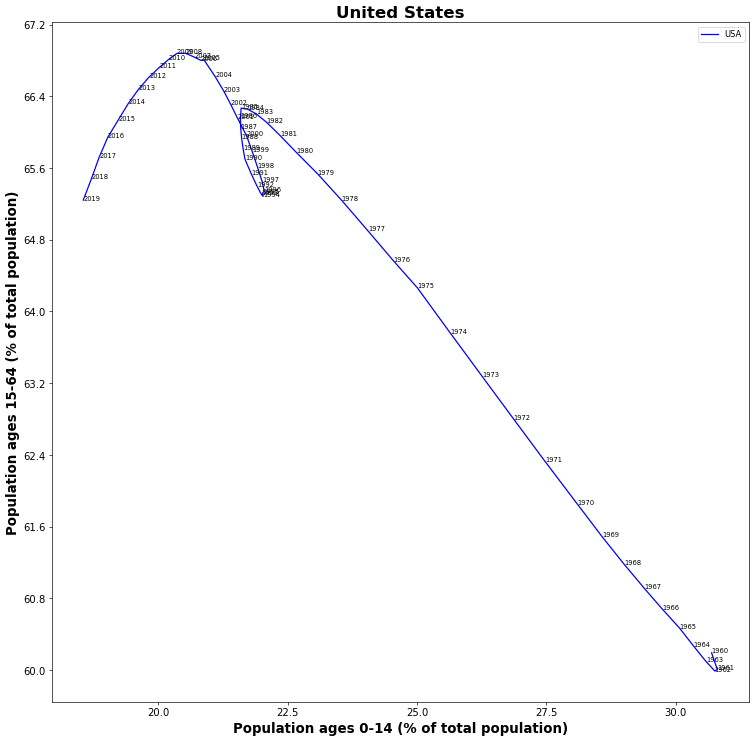

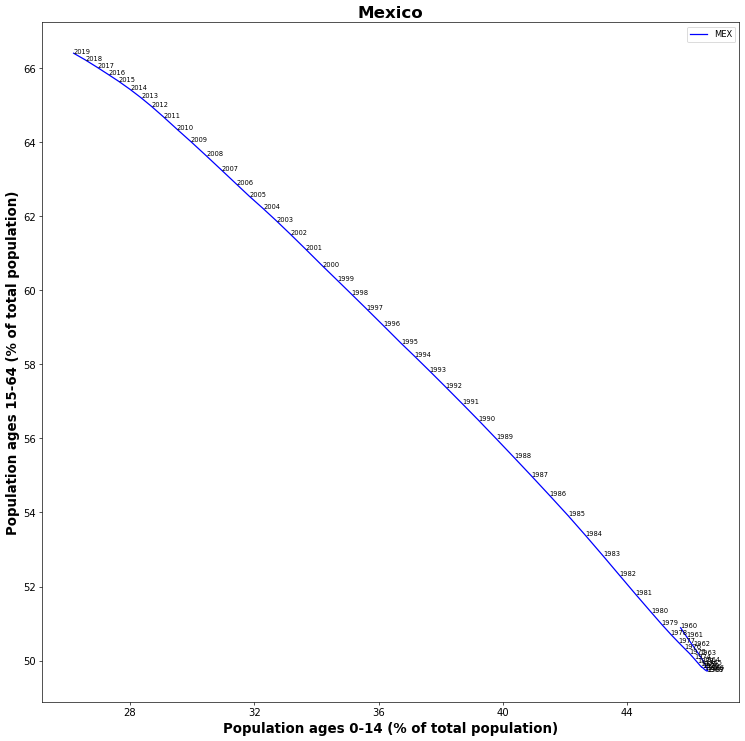

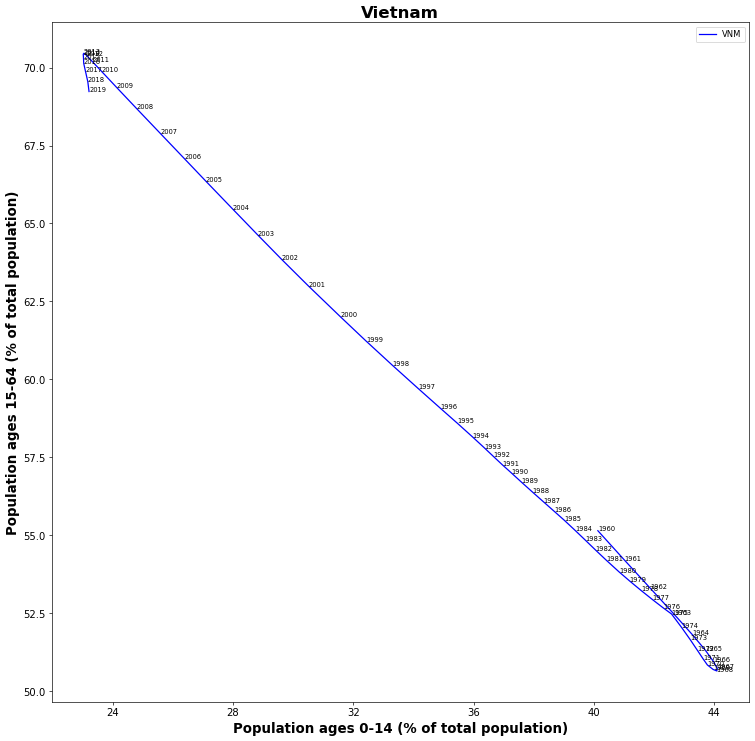

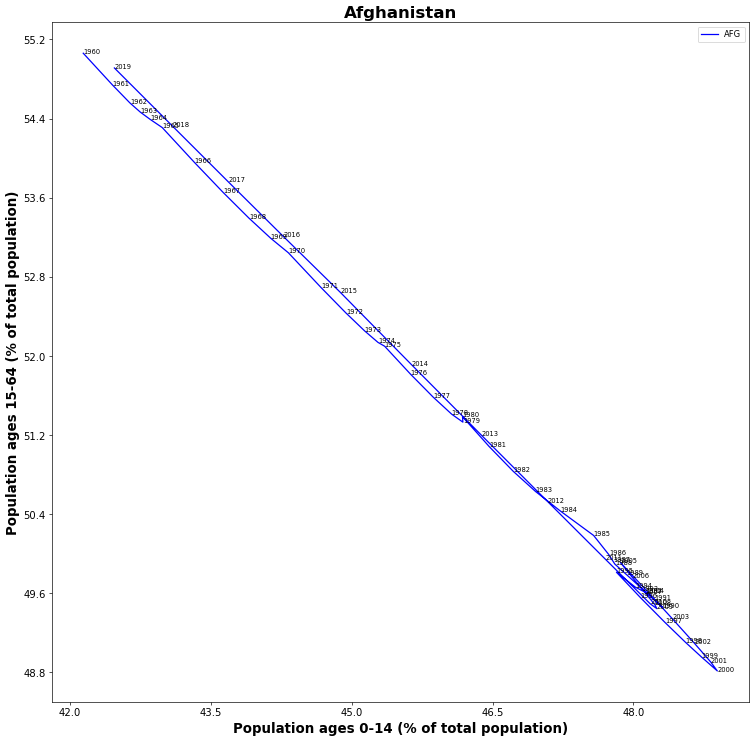

In [17]:
country_codes = ['USA', 'MEX', 'VNM', 'AFG']
indicator_pairs = [('SP.POP.0014.TO.ZS', 'SP.POP.1564.TO.ZS'), ('NY.GDP.MKTP.CD', 'SI.DST.05TH.20'), ('SE.PRM.CMPT.ZS','SE.SEC.CUAT.PO.ZS'), ('SL.TLF.CACT.FM.ZS', 'SL.TLF.ACTI.1524.NE.ZS')]

# this first pair of indicators compares the percentage of the population that is 0-14 yr old vs 15-64 yr old
for i in range(len(country_codes)):
        pi.plot_indicator_indicator(cur, country_codes[i], indicator_pairs[0][0], indicator_pairs[0][1])
        
        

#### Population ages 0-14 (%) vs Population ages 15-64 (%)

The plots show that as the percentage of the 0-14 age bracket in these countries has gone down relative to the 15-64 age bracket.  Assuming that the 15-64 age bracket only grows based on people getting older(ignoring mass migrations ...), then the plots show that people are having less kids as time has passed.  Interesting to note is Afghanistan as it actually showed the opposite trend from 1960 to 2000, then it reversed and mirrored the curves for the other countries.  Further analysis on the oddities in the curves, for example the population of the USA in the 90's, could provide more insight.  (... perhaps it could be simplified with changes in direction, as the two variables plotted are inversely proportional, when one increases, the other will probably decrease)

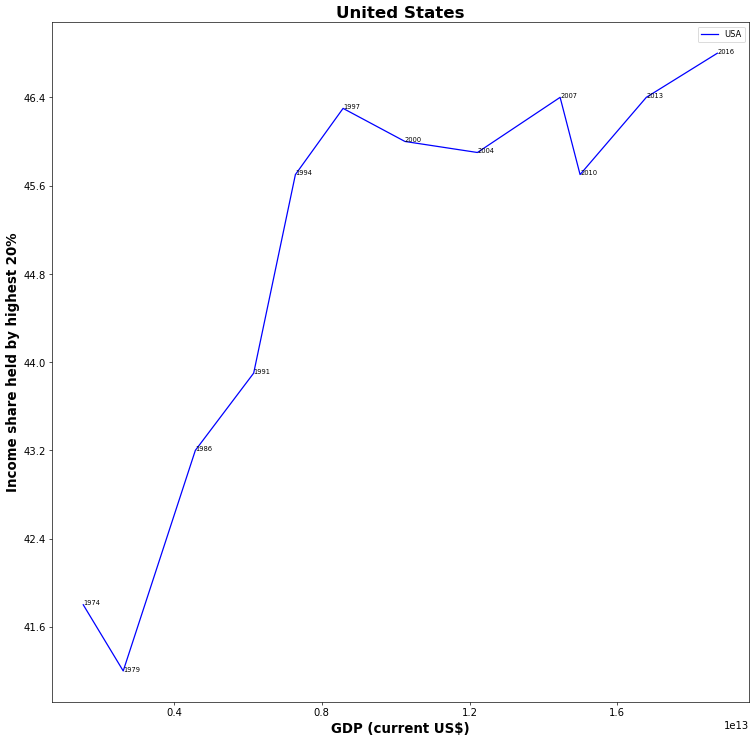

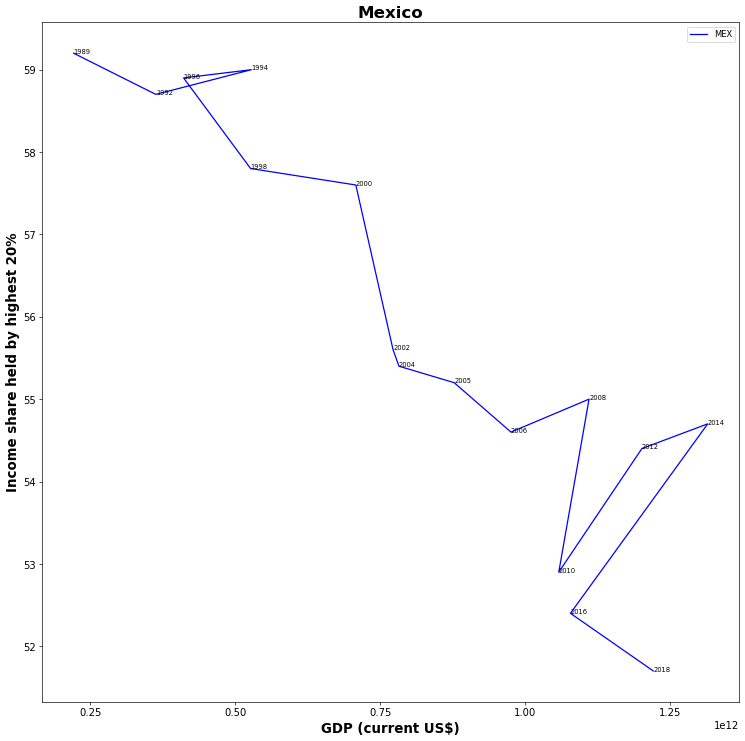

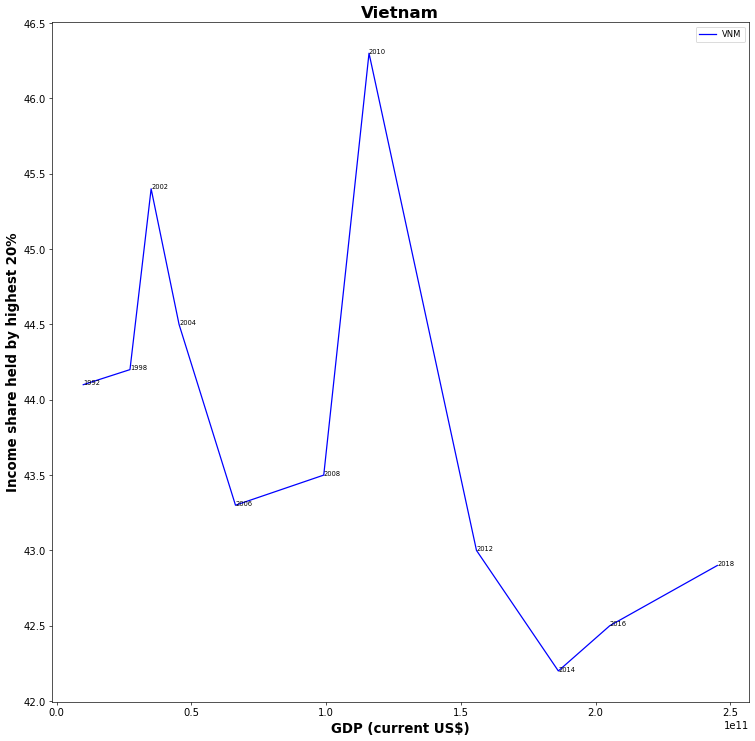

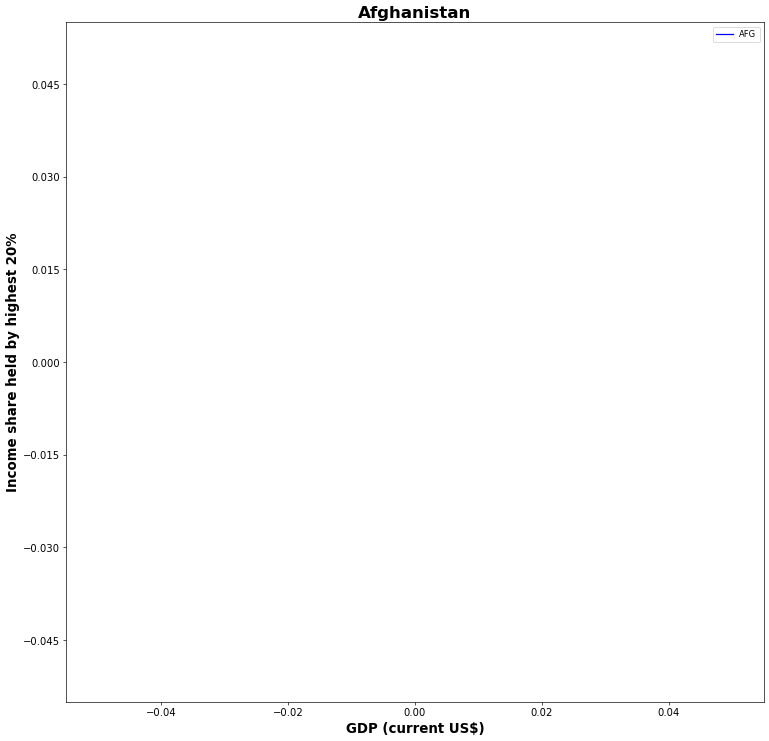

In [18]:
# this compares GDP to income share by the top 20%
for i in range(len(country_codes)):
        pi.plot_indicator_indicator(cur, country_codes[i], indicator_pairs[1][0], indicator_pairs[1][1])

#### GDP vs income share by the highest 20%

In the USA the line has a positive correlation, as it produces more, the highest 20% are increasing their share of the income.  In Vietnam and Mexico, the correlation is negative.  As GDP increases in these countries, the income share of the top 20% is decreasing.  A study on these plots for countries designated as high income vs those with middle income could when these two values are related, if at all.  Economic policy is a key determining factor in income distribution so perhaps an analysis of the economic systems pushed by each country could be supported with these plots.  Maybe the plots could show changes in economic policy over time.  Conversely, if the plots show no change while a shift in economic policy was instituted, then the effectiveness of such policies could be quantified.

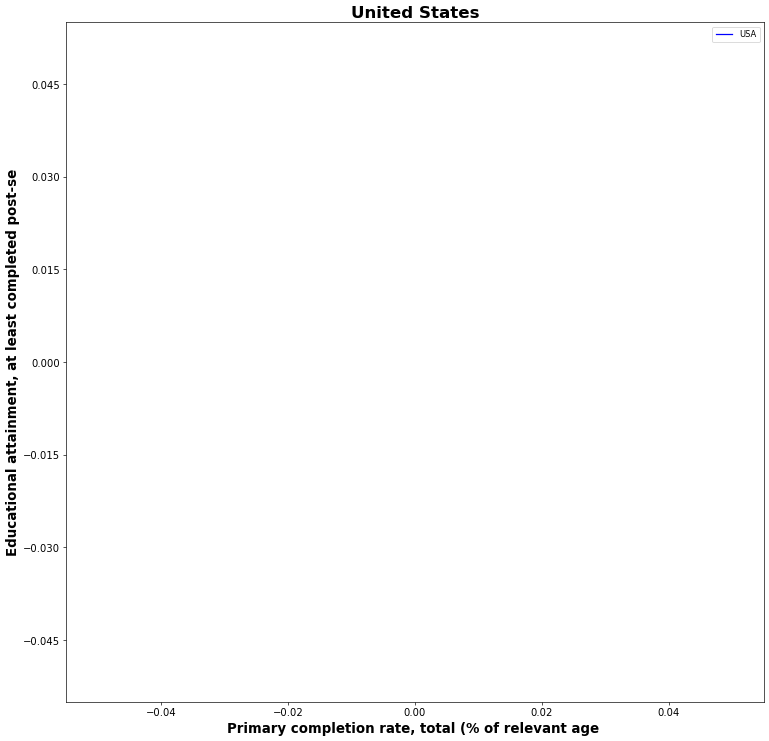

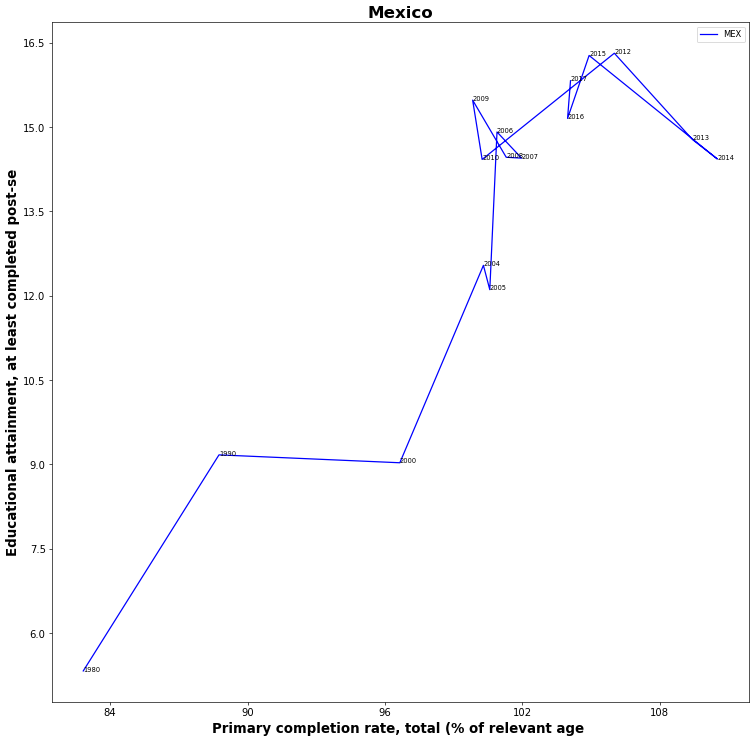

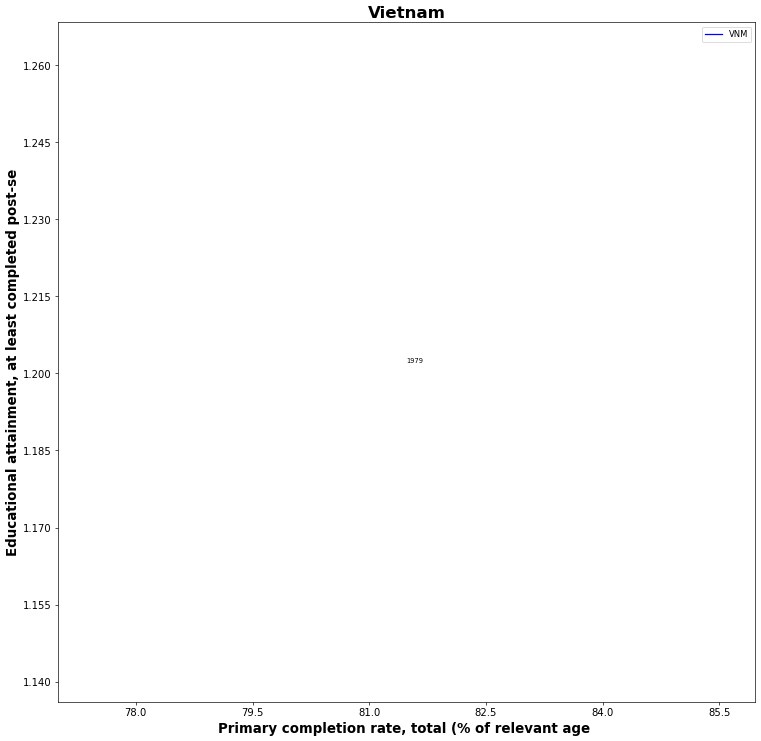

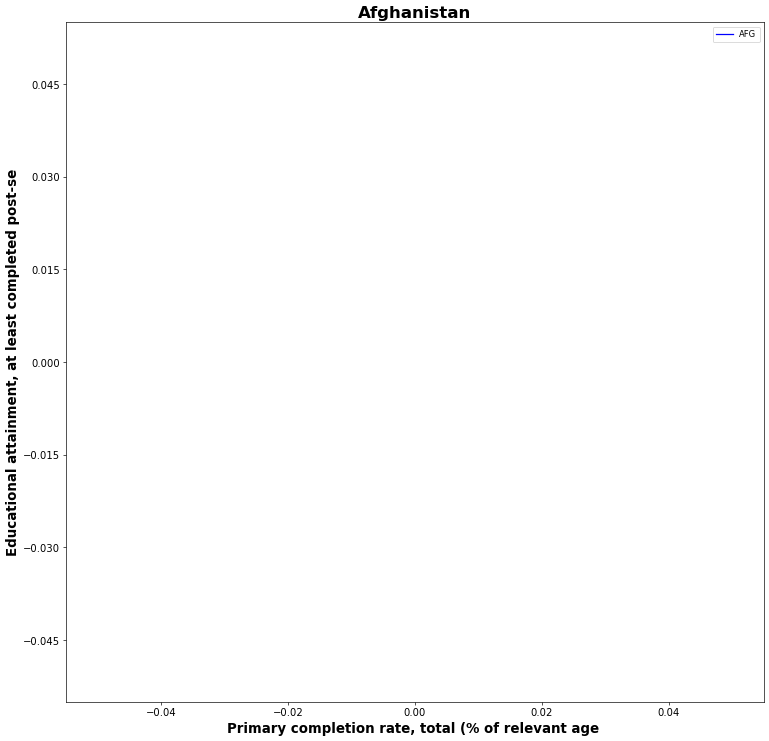

In [19]:
# this compares primary educational attainment vs post secondary educational attainment
for i in range(len(country_codes)):
        pi.plot_indicator_indicator(cur, country_codes[i], indicator_pairs[2][0], indicator_pairs[2][1])

#### Primary completion rate (%) vs Post secondary completion rate (%)

The data here is pretty sparse so Mexico is the only country with data that could be used by the plotting function as it is currently written.  As expected, as primary completion increases, so does post secondary completion.  The intention was to see if there where ranges of primary completion that no longer correlated with post secondary completion.  For example, for high income countries, the expectation is that primary completion is at or near 100%, but post secondary completion rates are sure to vary.  

Implementation Note: the function only plots points where both indicators have a value for that particular year.  If the dates the data was entered for each indicator are staggered, then this function would not plot any of them.

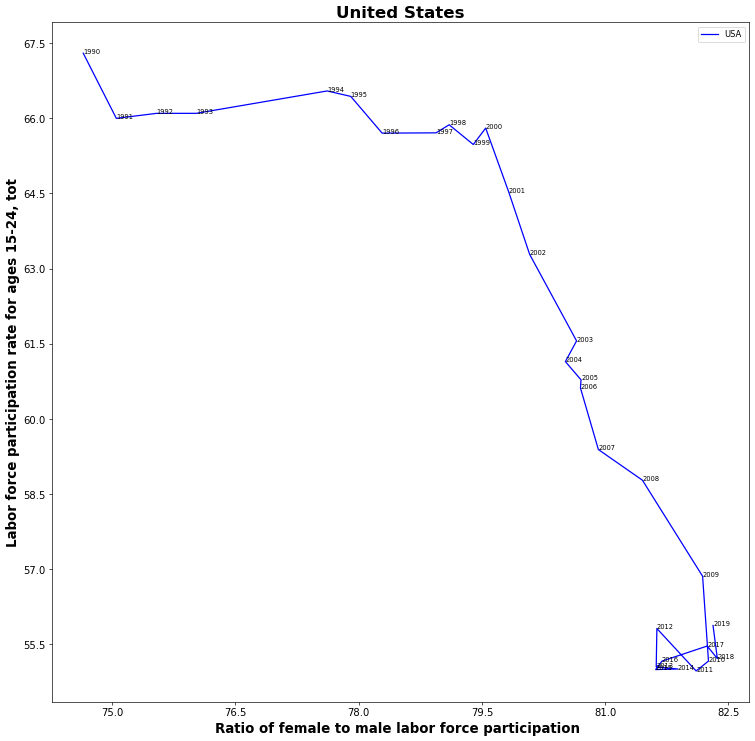

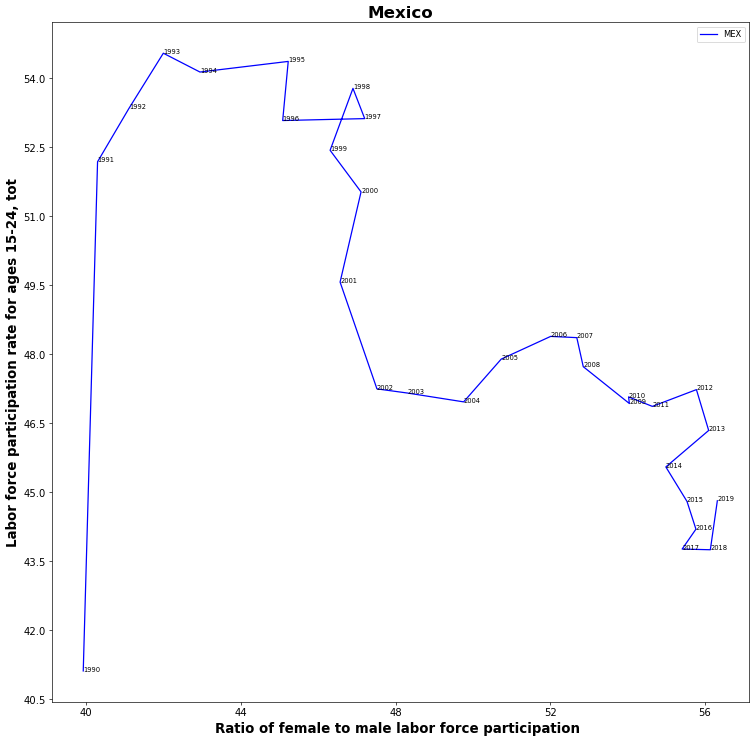

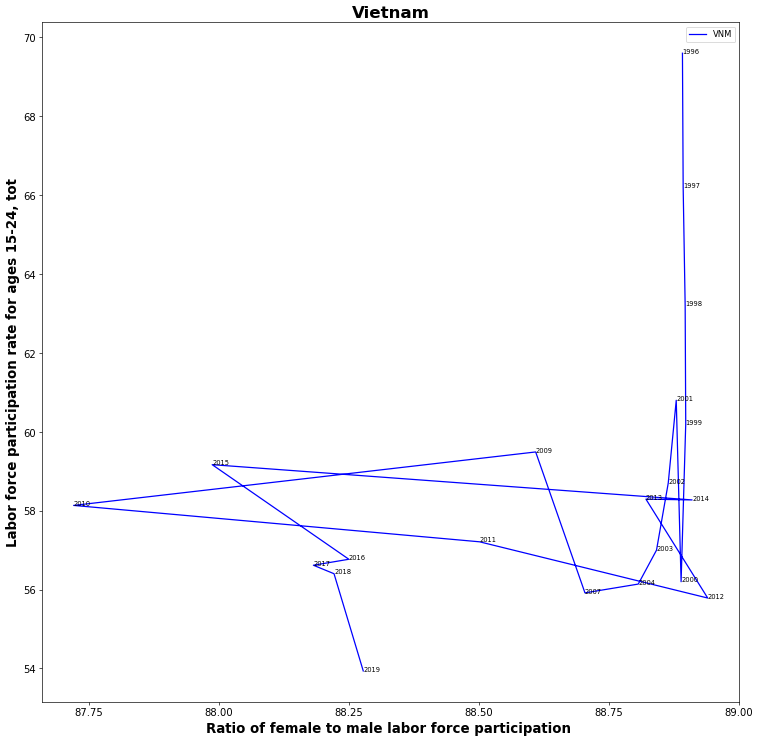

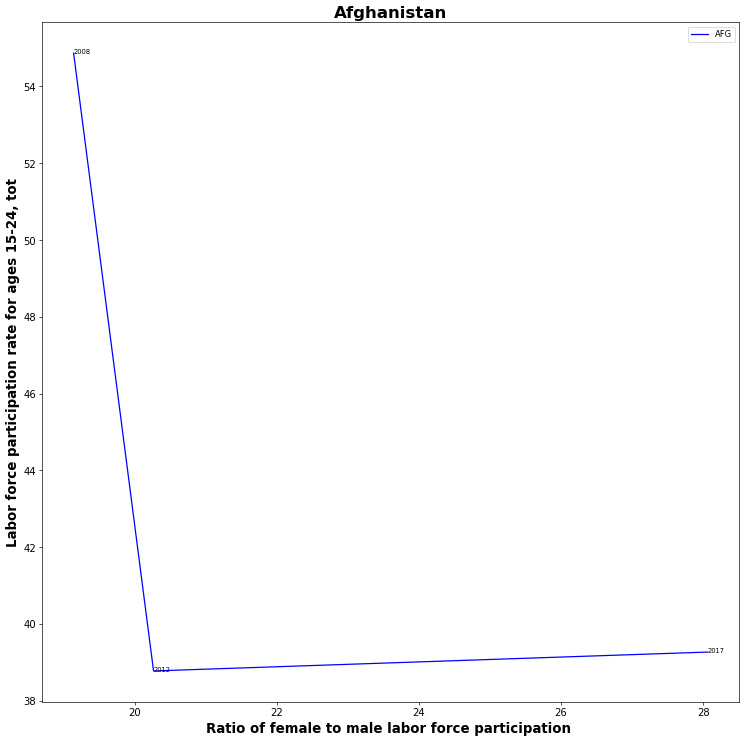

In [20]:
# this compares the ratio of female to male labor force participation vs overall labor force participation
for i in range(len(country_codes)):
        pi.plot_indicator_indicator(cur, country_codes[i], indicator_pairs[3][0], indicator_pairs[3][1])

#### Ratio of female to male labor force participation (%) vs labor force participation rate (%)

The ratio of females to males has increased across the board.  The labor force participation rate has also decreased for the countries selected.  The paths to these results though, is quite ecclectic.  In the US, the labor force participation rate held steady from 1990 to 2000 at around 66% while the female to male ratio increased from 75% to 79.5%.  Then there was a 10% drop in the labor force participation rate while the female to male ratio went up about 2%.  Mexico's labor force participation rate initially spiked by 10% from 1990 to 1991.  After that, a step-like curve forms.  For both Mexico and the US(... and for Vietnam and Afghanistan for that matter), two things seem to be exclusive: drops in the labor force participation rate and increases in the female to male ratio.  Mexico's drop in labor force participation is accompanied by a static female to male ratio while a rise in the female to male ratio is accompanied by a static labor force participation rate.  While Vietnam's data shows this exclusivity, the drop in the labor force participation rate has been accompanied with slight decrease in the female to male ratio.  The range of the female to male ratio is only 2% so the x-axis scaling exaggerates the year to year changes.  The data for Afghanistan is sparse but a 15% drop in the labor force participation was then followed by an 8% increase in the female to male ratio.

To supplement these graphs, the male to female population would be needed to see if the changes in the female to male ratio are because of the population's demographics or structural/cultural changes.



## Plotting indicators in a stacked bar graph

### stacked_bar_graphs(cur, indicators, country_codes, plot_rows, plot_columns, show_all = True)

This function plots related indicators with similar scales in a stacked bar graph form.  This will be applied to the following areas: income share %, population age bracket %, and educational attainment.

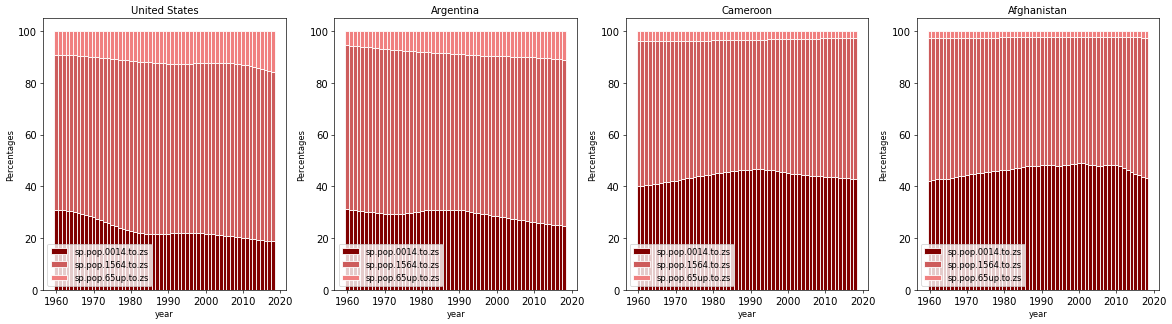

In [21]:
country_codes = ['USA', 'ARG', 'CMR', 'AFG']
population_indicators = ['sp.pop.0014.to.zs','sp.pop.1564.to.zs','sp.pop.65up.to.zs']
income_indicators = ['SI.DST.FRST.20', 'SI.DST.04TH.20','SI.DST.03RD.20','SI.DST.02ND.20','SI.DST.05TH.20']

pi.stacked_bar_graphs(cur, population_indicators, country_codes, 1, 4, False)